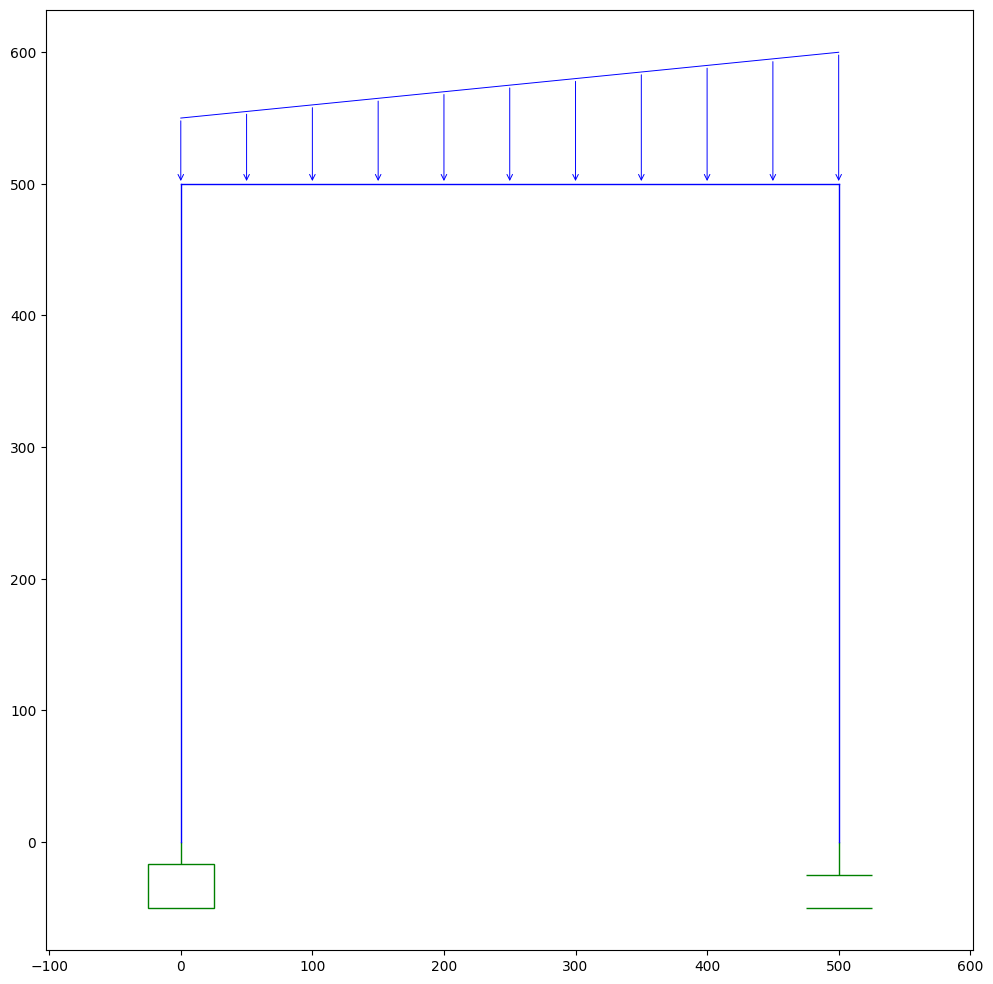

In [2]:
from core.system import SystemMilcaModel


model = SystemMilcaModel()

E = 30
v = 0.15
g = 0
b = 40
h = 50

B = 500
H = 300

# agregar materiales
model.add_material(name="concreto", modulus_elasticity=E,
                   poisson_ratio=v, specific_weight=g)

# # agregar secciones
model.add_rectangular_section("seccion1", "concreto", b, h)

# # agregar nodos
model.add_node(1, (0, 0))
model.add_node(2, (0, 500))
model.add_node(3, (500, 500))
model.add_node(4, (500, 0))


# # agregar elementos
model.add_element(1, "FRAME", 1, 2, "seccion1")
model.add_element(2, "FRAME", 2, 3, "seccion1")
model.add_element(3, "FRAME", 3, 4, "seccion1")


# # agregar restricciones
model.add_restraint(1, (True, True, True))
model.add_restraint(4, (False, True, True))

# # agregar patrones de carga
model.add_load_pattern(name="muerta")

# agregar cargas puntuales
model.add_distributed_load(2, "muerta", "LOCAL", -25, -50)

# resolver el modelo
model.solve()

# mostrar la estructura en figura
model.show_structure()

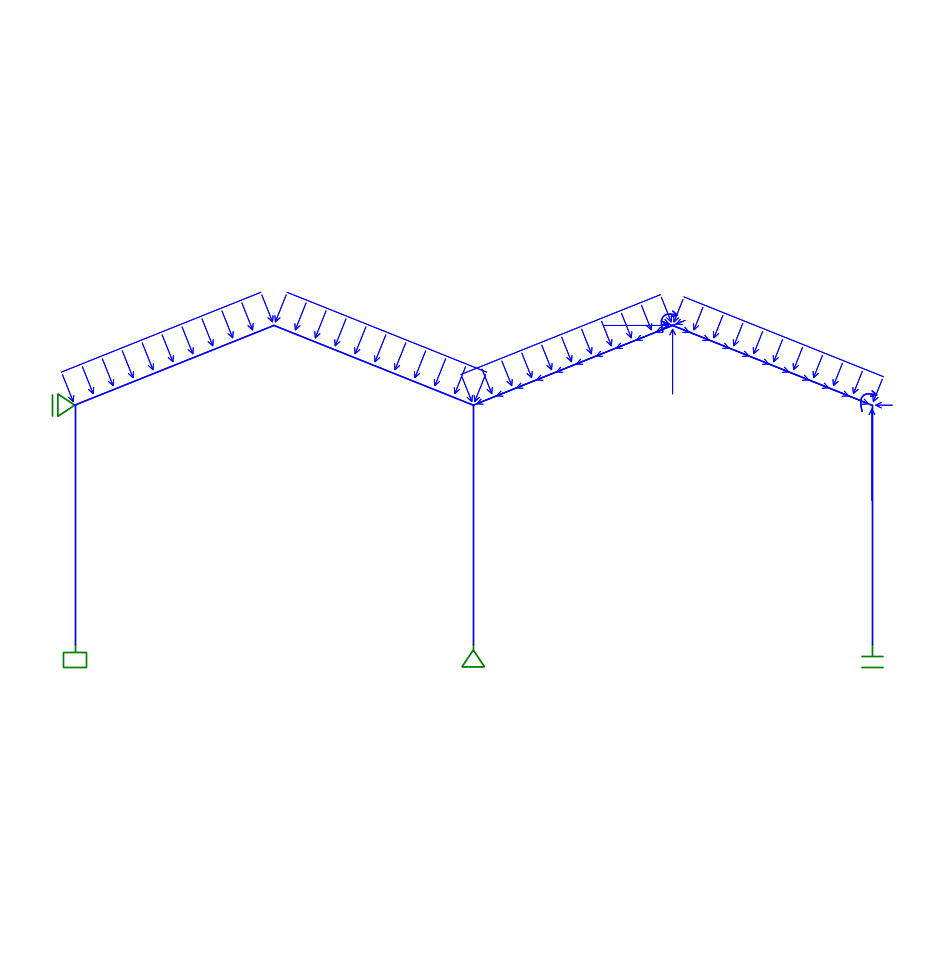

In [4]:

from core.system import SystemMilcaModel
import pandas as pd
# from main import SytemMilcaModel

# crear el modelo estructural
model = SystemMilcaModel()


E = 30
v = 0.15
g = 0
b = 40
h = 50

B = 500
H = 300
Hh = 100

# agregar materiales
model.add_material(name="concreto", modulus_elasticity=E,
                   poisson_ratio=v, specific_weight=g)

# # agregar secciones
model.add_rectangular_section("seccion1", "concreto", b, h)

# # agregar nodos
model.add_node(1, (0, 0))
model.add_node(2, (0, H))
model.add_node(3, (B/2, H+Hh))
model.add_node(4, (B, H))
model.add_node(5, (B, 0))

model.add_node(6, (B + B/2, H + Hh))
model.add_node(7, (B + B, H))
model.add_node(8, (B + B, 0))


# # agregar elementos
model.add_element(1, "FRAME", 1, 2, "seccion1")
model.add_element(2, "FRAME", 2, 3, "seccion1")
model.add_element(3, "FRAME", 3, 4, "seccion1")
model.add_element(4, "FRAME", 4, 5, "seccion1")

model.add_element(5, "FRAME", 4, 6, "seccion1")
model.add_element(6, "FRAME", 6, 7, "seccion1")
model.add_element(7, "FRAME", 7, 8, "seccion1")

# # agregar restricciones
model.add_restraint(1, (True, True, True))
model.add_restraint(2, (True, False, False))
model.add_restraint(5, (True, True, False))
model.add_restraint(8, (False, True, True))

# # agregar patrones de carga
model.add_load_pattern(name="muerta")

# agregar cargas puntuales
model.add_point_load(6, "muerta", "GLOBAL", 100, 100, 50)
model.add_point_load(7, "muerta", "LOCAL", 100, 100, 50, angle_rot=45)
# agregar cargas distribuidas
model.add_distributed_load(2, "muerta", "LOCAL", -50, -50)
model.add_distributed_load(3, "muerta", "LOCAL", -50, -50)
model.add_distributed_load(5, "muerta", "GLOBAL", 50, 50, direction="GRAVITY")
model.add_distributed_load(6, "muerta", "GLOBAL", 50,
                           50, direction="GRAVITY_PROJ")
# model.add_distributed_load(7, "muerta", "GLOBAL", 50, 50, direction="MOMENT", load_type="MOMENT")

# resolver el modelo
model.solve()

# Mostrar la estructura sin mostrar la figura inmediatamente
model.show_structure(show=False)
for ax in model.plotter.fig.axes:
    ax.axis("off")  # Ocultar ejes
model.show_structure()